# Kernel Principle Component Analysis

## Algebra
Neigther nonprobabilistic PCA and probabilistic PCA fail if there is no pricinple components in the original space. In such case, we may consider to map the original space to a new space first and followes PCA in the mapped space.

Suppse that we have offset the dataset to have a zero mean, $\sum_{n=1}^N\boldsymbol{x}_n = 0$, and use a function $\boldsymbol{\phi}(\boldsymbol{x}_n)$ to map D-dimensional observation to be M-dimension. For convenient, we suppose $\boldsymbol{\phi}(\boldsymbol{x}_n)$ also have a zero mean,  $\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n) = 0$. For nonprobabilistic PCA, we need to obtain the covariance:

$$
C = \frac{1}{N}\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n)\boldsymbol{\phi}(\boldsymbol{x}_n)^T
$$

and do the eigenvector expansion:

$$
C\boldsymbol{v}_i = \lambda_i\boldsymbol{v}_i
$$

It seems naive to do the above process. **However, our goal is to solve the eigenvalue problem without explicitly working in the $\boldsymbol{\phi}(\boldsymbol{x})$ space.**

We have

$$
C\boldsymbol{v}_i = \frac{1}{N}\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n)(\boldsymbol{\phi}(\boldsymbol{x}_n)^T\boldsymbol{v}_i)
= \lambda_i\boldsymbol{v}_i
$$

then $\boldsymbol{v}_i$ can be written in the form:

$$
\boldsymbol{v}_i = \sum_{n=1}^Na_{ni}\boldsymbol{\phi}(\boldsymbol{x}_n)
$$

Substitute $\boldsymbol{v}_i$ back to the eigenvectors expansion:

$$
\frac{1}{N}\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n)\boldsymbol{\phi}(\boldsymbol{x}_n)^T\sum_{m=1}^Na_{mi}\boldsymbol{\phi}(\boldsymbol{x}_m)
= \lambda_i\sum_{n=1}^Na_{ni}\boldsymbol{\phi}(\boldsymbol{x}_n)
$$

$$
\Rightarrow
\boldsymbol{\phi}(\boldsymbol{x}_l)^T\frac{1}{N}\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n)\boldsymbol{\phi}(\boldsymbol{x}_n)^T\sum_{m=1}^Na_{mi}\boldsymbol{\phi}(\boldsymbol{x}_m)
= \boldsymbol{\phi}(\boldsymbol{x}_l)^T\lambda_i\sum_{n=1}^Na_{ni}\boldsymbol{\phi}(\boldsymbol{x}_n)
$$

$$
\Rightarrow
\frac{1}{N}\sum_{n=1}^Nk(\boldsymbol{x}_l, \boldsymbol{x}_n)\sum_{m=1}^na_{mi}k(\boldsymbol{x}_n, \boldsymbol{x}_m)
= \lambda_i\sum_{n=1}^Na_{ni}k(\boldsymbol{x}_l, \boldsymbol{x}_n)
$$

Then we could have

$$
K^2\boldsymbol{a}_i = N\lambda_iK\boldsymbol{a}_i 
$$

where K is the Gram matrix composed of kernel functions $k(\boldsymbol{x}_n, \boldsymbol{x}_m)$. Though K is not guaranteed to be have no zero eigen value. But those zero eigen value is out of our interest in finding the principle components. Thus we could directly solve the following eigenvalue problem to get $\boldsymbol{a}_i$:

$$
K\boldsymbol{a}_i = N\lambda_i\boldsymbol{a}_i 
$$

Centernly we should put some constraint on $\boldsymbol{a}_i$. It should be normalized according to $\boldsymbol{v}_i^T\boldsymbol{v}_i = 1$:

$$
\sum_{m=1}^Na_{mi}\boldsymbol{\phi}(\boldsymbol{x}_m)^T\sum_{n=1}^Na_{ni}\boldsymbol{\phi}(\boldsymbol{x}_n)
=\boldsymbol{a}_i^TK\boldsymbol{a}_i = \lambda_iN\boldsymbol{a}_i^T\boldsymbol{a}_i= 1
$$

Suppose $\boldsymbol{v}_j$ is one principle component, an observation $\boldsymbol{x}$ will have a projection $y_j(\boldsymbol{x})$,

$$
y_j(\boldsymbol{x}) = \boldsymbol{\phi}({\boldsymbol{x}})^T\boldsymbol{v}_j = \sum_{n=1}^Na_{nj}k(\boldsymbol{x}, \boldsymbol{x}_n)
$$

Finally we remove the constrain that $\sum_{n=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n) = 0$. We shift $\boldsymbol{\phi}(\boldsymbol{x}_n)$ by:

$$
\widetilde{\boldsymbol{\phi}}(\boldsymbol{x}_n)
= \boldsymbol{\phi}(\boldsymbol{x}_n) - \sum_{l=1}^N\boldsymbol{\phi}(\boldsymbol{x}_l)
$$

Then

$$
\begin{align}
\widetilde{K}_{nm} &= \widetilde{\boldsymbol{\phi}}(\boldsymbol{x}_n)^T\widetilde{\boldsymbol{\phi}}(\boldsymbol{x}_m) \\
&= \boldsymbol{\phi}(\boldsymbol{x}_n)^T\boldsymbol{\phi}(\boldsymbol{x}_m) 
- \frac{1}{N}\sum_{l=1}^N\boldsymbol{\phi}(\boldsymbol{x}_n)^T\boldsymbol{\phi}(\boldsymbol{x}_l)
- \frac{1}{N}\sum_{l=1}^N\boldsymbol{\phi}(\boldsymbol{x}_l)^T\boldsymbol{\phi}(\boldsymbol{x}_m)
+ \frac{1}{N^2}\sum_{l=1,j=1}^N\boldsymbol{\phi}(\boldsymbol{x}_l)^T\boldsymbol{\phi}(\boldsymbol{x}_j) \\
&= k(\boldsymbol{x}_n, \boldsymbol{x}_m) - \frac{1}{N}\sum_{l=1}^Nk(\boldsymbol{x}_n, \boldsymbol{x}_l)
- \frac{1}{N}\sum_{l=1}^Nk(\boldsymbol{x}_l, \boldsymbol{x}_m) + \frac{1}{N^2}\sum_{l=1,j=1}^Nk(\boldsymbol{x}_l, \boldsymbol{x}_j) 
\end{align}
$$

which can be written:

$$
\widetilde{K} = K - \boldsymbol{1}_NK - K\boldsymbol{1}_N + \boldsymbol{1}_NK\boldsymbol{1}_N
$$

where $\boldsymbol{1}_N$ is an N by N matrix with each element equal to $\frac{1}{N}$

## Simulation

We do the kernel PCA and plot a contour in the original space. The contour is define by $$
y_i(\boldsymbol{x})= \boldsymbol{\phi}(\boldsymbol{x})^T\boldsymbol{v}_i
=sum_{n=1}^Na_{in}k(\boldsymbol{x}, \boldsymbol{x}_n)
$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn
def kernel(X, X_T, kernel_type = "Guassian"):
    if kernel_type == "Guassian":
        G = np.linalg.norm(X - X_T, axis = -1)
        return np.exp(-G*G*10)
    if kernel_type == "Exponential":
        G = np.linalg.norm(X - X_T, axis = -1)
        return np.exp(-G)

def get_grammatrix(X, kernel_type):
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    X = np.tile(X, (len(X), 1, 1))
    X_T = np.transpose(X, (1, 0, 2))
    G = kernel(X, X_T, kernel_type)
    return G

def get_grammatrix_tilt(X, kernel_type):
    G = get_grammatrix(X, kernel_type)
    I = np.ones(G.shape)/len(X)
    G = G - I.dot(G) - G.dot(I) + I.dot(G).dot(I)
    return G

def get_z(XY, N, a):
    XY = np.tile(XY, (N, 1, 1, 1)).transpose((1, 2, 0, 3))
    kernel_z = kernel(XY, C.reshape((1,1) + C.shape), kernel_type = "Guassian")
    s = kernel_z.shape
    if len(a.shape) == 1:
        a = a.reshape(-1,1)
    Zs = kernel_z.reshape(-1, N).dot(a).reshape(s[:2] + (a.shape[1],))
    return Zs
    
def plot(C, X, Y, Z, ax):    
    ax.scatter(C[:,0], C[:,1],alpha = 0.5)
    ax.contour(X, Y, Z, cmap = "jet")
    

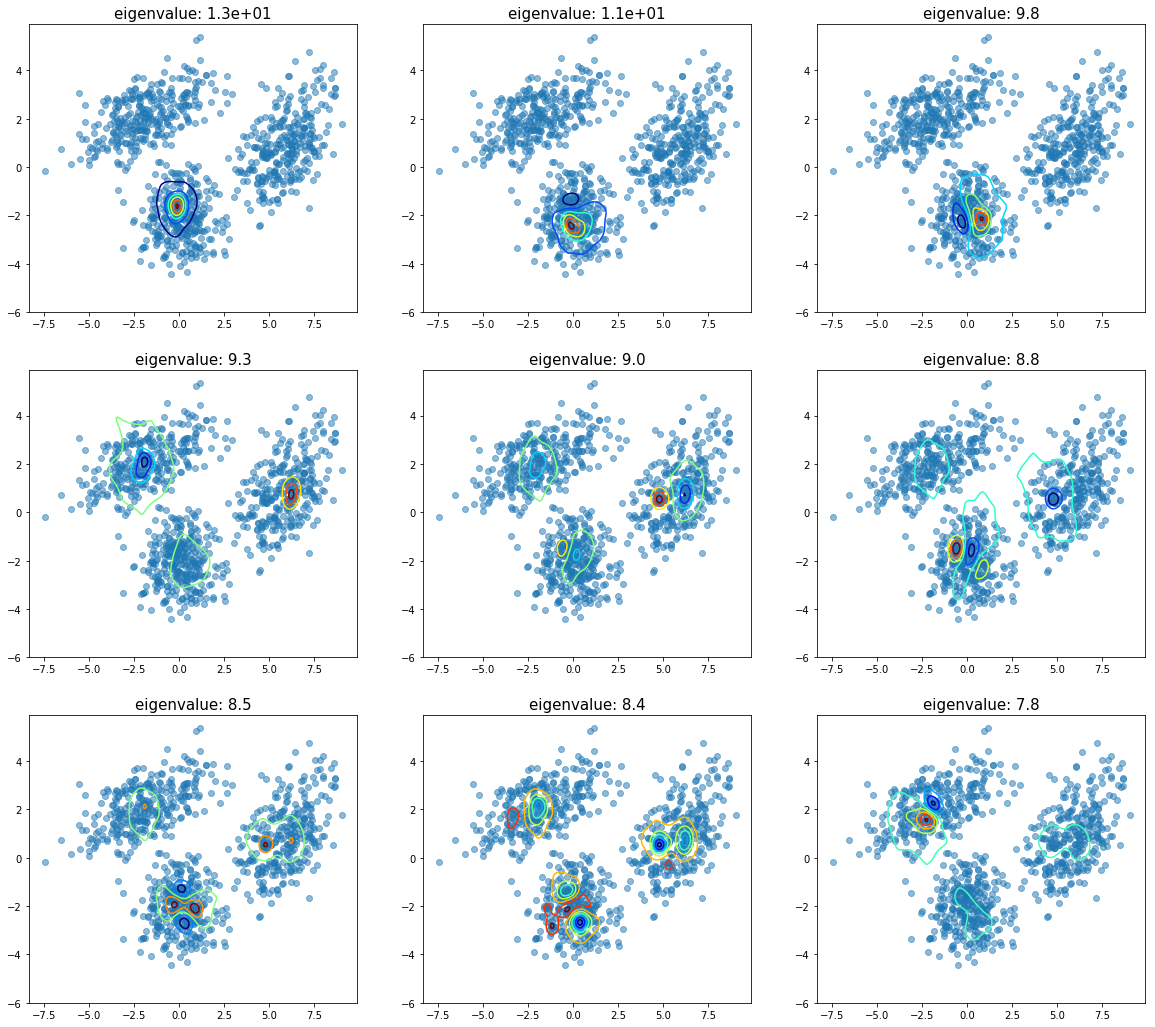

In [28]:
NUM_C_1 = 300
NUM_C_2 = 300
NUM_C_3 = 300

C_1 = np.random.multivariate_normal([-2,2], [[3,1],[1,1]] , NUM_C_1)
C_2 = np.random.multivariate_normal([6,1], [[2,1],[1,2]] , NUM_C_2)
C_3 = np.random.multivariate_normal([0,-2], [[1,0],[0,1]] , NUM_C_3)
C_list = [C_1, C_2, C_3]
C = np.concatenate((C_1, C_2, C_3), axis = 0)
G = get_grammatrix_tilt(C, "Guassian")
eigen_val, eigen_vec = np.linalg.eig(G)
a_array = eigen_vec / (np.abs(eigen_val) ** 0.5)
fig, axes = plt.subplots(3, 3, figsize = (20, 18))
axes = axes.reshape(9)

X, Y = np.arange(-7, 10, 0.1), np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(X, Y)
XY = np.concatenate((X.reshape(X.shape + (1,)), Y.reshape(Y.shape + (1,))), axis = -1)
Zs = get_z(XY, len(C), a_array[:, :9])
for i in range(9):
    plot(C, X, Y, Zs[:,:,i],axes[i])
    axes[i].set_title("eigenvalue: {:.2}".format(eigen_val[i]), fontsize = 15)